# Notebook 3: Visualization of Model Results (Full Dataset)

## Overview:

This notebook takes in the modeling results from the prior notebook & creates visualizations.

Steps performed by the included functions:
- import original processed data set
- import model fit data from pickled model files
- create a coefficient/beta bar chart for each Cash Trap Trigger category (relevant for logistic regression modeling only)
- create a confusion matrix for each Cash Trap Trigger category

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import confusion_matrix

## Define Functions for Modeling Data Imports and Visualizations

In [2]:
def get_reshaped_lemmatized():
    # Import the CSV file containing the reshaped data set
    reshaped_df = pd.read_csv('../data/reshaped_lemmatized.csv')
    return reshaped_df

In [3]:
def get_pickled_data(path, filename):
    openfile = open(path+filename, "rb")
    df = pickle.load(openfile)
    openfile.close()
    
    return df

In [4]:
def coefficient_plots(results_df):
    '''
    Plots the top 10 and bottom 10 coefficients for each category. Works only for logistic regression models.
    '''
    for row in results_df.itertuples(index = True, name = 'Pandas'):
        model_type = getattr(row, "model") # Confirm that the model was logistic regression
        if model_type == 'lr':
            names = getattr(row, "model_result").best_estimator_.steps[0][1].get_feature_names()
            betas = getattr(row, "model_result").best_estimator_.named_steps['lr']
            coef = np.array(betas.coef_).tolist()[0]
            top_words = list(zip(names, coef))
            df_coefs = pd.DataFrame(top_words).rename(columns = {0: 'word', 1: 'coef'}).sort_values(by = 'coef', ascending = True)


            coefs_1 = df_coefs.sort_values(by = 'coef', ascending=False).tail(10) # getting the top 10 coefficients
            coefs_2 = df_coefs.sort_values(by = 'coef', ascending=False).head(10) # getting the bottom 10 coefficients
            coefs = pd.concat([coefs_2, coefs_1], axis = 0) # merging the two into one
            # plotting importance
            plt.figure(figsize=(10, 8)) # plotting the coefficients
            plt.title(f'Feature Coefficients for {getattr(row,"target").replace("_", " ").title()}', fontsize=25)
            sns.set_style("darkgrid")
            sns.barplot(data=coefs,
                        x= 'coef',
                        y='word',
                        orient='h',
                        palette = 'PuBuGn_d')
            plt.xlabel('coefficient', fontsize=15)
            plt.ylabel('feature', fontsize=15)
            plt.tick_params(labelsize=15)
        else: pass # Won't run the plotting code if the model was random forest.

In [5]:
def create_confusion_matrix(results_df):
    '''
    Plots the top 10 and bottom 10 coefficients for each category
    '''
    for row in results_df.itertuples(index = True, name = 'Pandas'):
        best_model = getattr(row, "model_result").best_estimator_
        preds = best_model.predict(getattr(row, "split_data")['X_test'])
        
        cm_test = confusion_matrix(getattr(row, "split_data")['y_test'], preds)
        cm_test = pd.DataFrame(cm_test, columns=['Predicted Negative','Predicted Positive'], 
                       index=['Actual Negative','Actual Positive'])
        plt.figure(figsize = (6,6))
        ax = plt.subplot()
        sns.heatmap(cm_test, 
            annot=True, 
            ax = ax, 
            fmt='g', 
            cbar=False,
            cmap="Blues"); #annot=True to annotate cells

        # labels, title and ticks
        ax.set_title(f'Confusion Matrix - {getattr(row,"target").replace("_", " ").title()}', size=16)
        ax.set_xlabel('Predicted', size=14)
        ax.set_ylabel('Actual', size=14)
        ax.xaxis.set_ticklabels(['Negative', 'Positive'])
        ax.yaxis.set_ticklabels(['Negative', 'Positive']);

## Call Functions

In [6]:
# Import Model data
path = '../data/exported_data/'
df = get_reshaped_lemmatized()

# get results df from notebook 2
results_df = get_pickled_data(path, 'results_df.pkl')

# get the structure containing the run models
full_output_dict = get_pickled_data(path, 'full_output_dict.pkl')

In [7]:
results_df.head()

,target,model,metric,model_input,split_data,model_result,best_params,count_deduplicated,test_data_count,best_crossval_score,train_score,test_score
0,nontrigger,lr,roc_auc,SentenceLemmas,{'X_train': [' trigger period mean a period a ...,"GridSearchCV(cv=3,\n estimator=Pip...","{'cvec__max_df': 0.99, 'cvec__max_features': 1...",1030,309,0.986805,0.999823,0.985161
1,loan_default,lr,roc_auc,SentenceLemmas,{'X_train': ['upon the occurrence of a lockbox...,"GridSearchCV(cv=3,\n estimator=Pip...","{'cvec__max_df': 0.99, 'cvec__max_features': 4...",553,166,0.980591,0.999170,0.993301
2,unspecified,lr,roc_auc,SentenceLemmas,{'X_train': ['any fund remain in the reserve a...,"GridSearchCV(cv=3,\n estimator=Pip...","{'cvec__max_df': 0.99, 'cvec__max_features': 1...",498,149,0.966240,0.999926,0.962905
3,debt_yield_fall,lr,roc_auc,SentenceLemmas,{'X_train': [' approve operating expense mean ...,"GridSearchCV(cv=3,\n estimator=Pip...","{'cvec__max_df': 0.99, 'cvec__max_features': 2...",188,56,0.976543,0.999969,0.997569
4,mezzanine_default,lr,roc_auc,SentenceLemmas,{'X_train': ['borrower hereby represent and wa...,"GridSearchCV(cv=3,\n estimator=Pip...","{'cvec__max_df': 0.99, 'cvec__max_features': 1...",72,22,0.949633,1.000000,0.994850


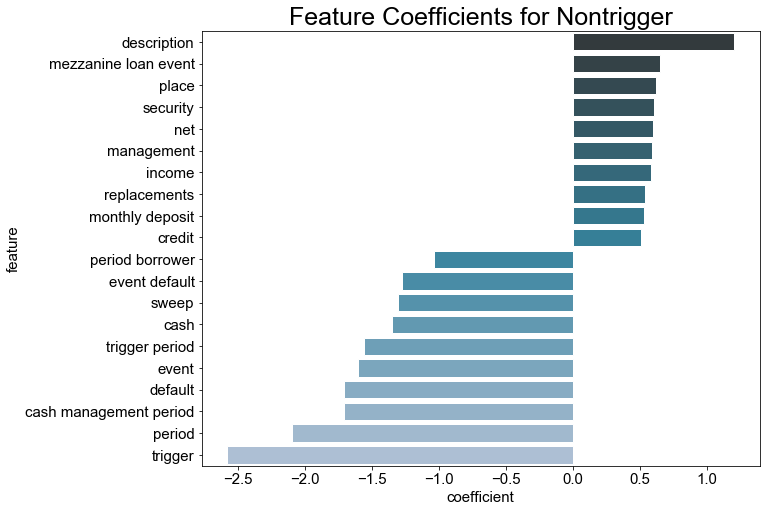

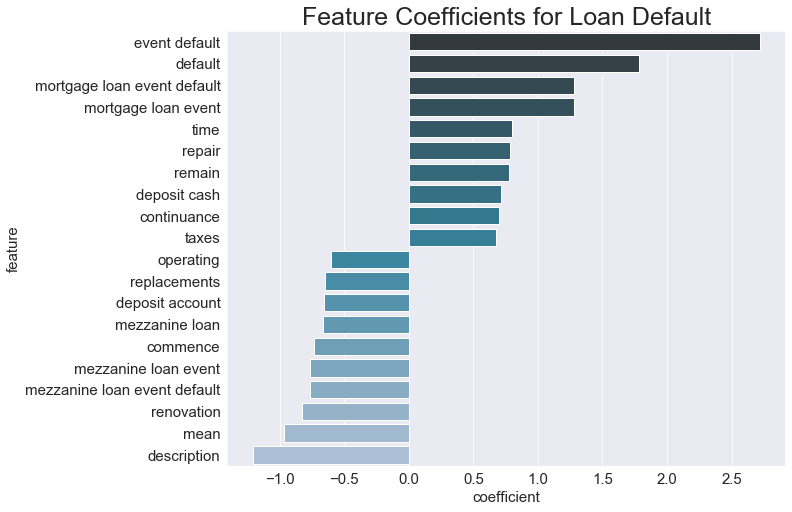

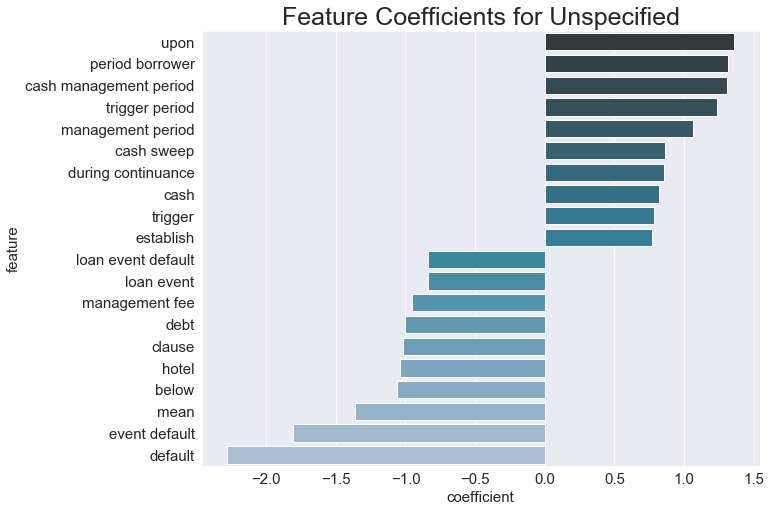

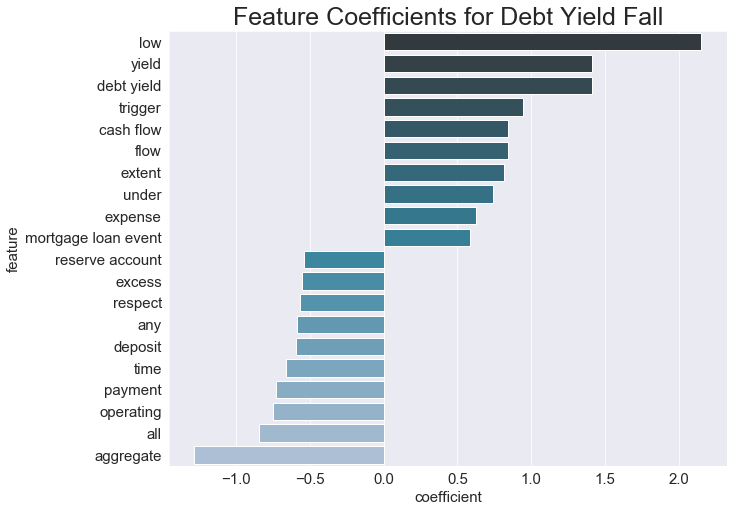

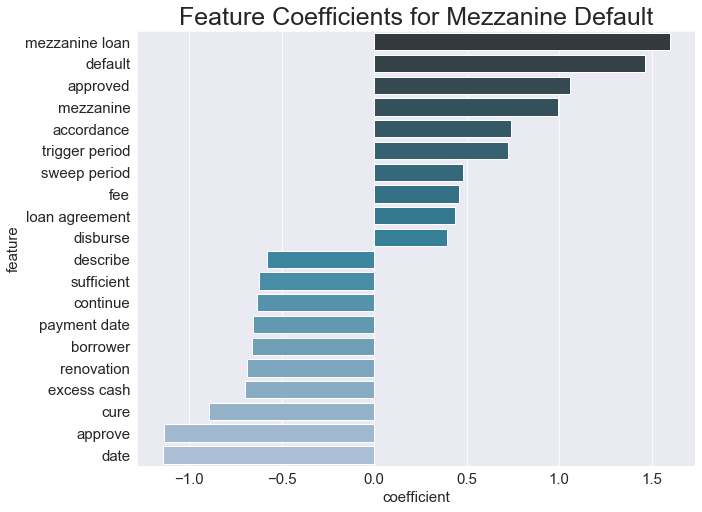

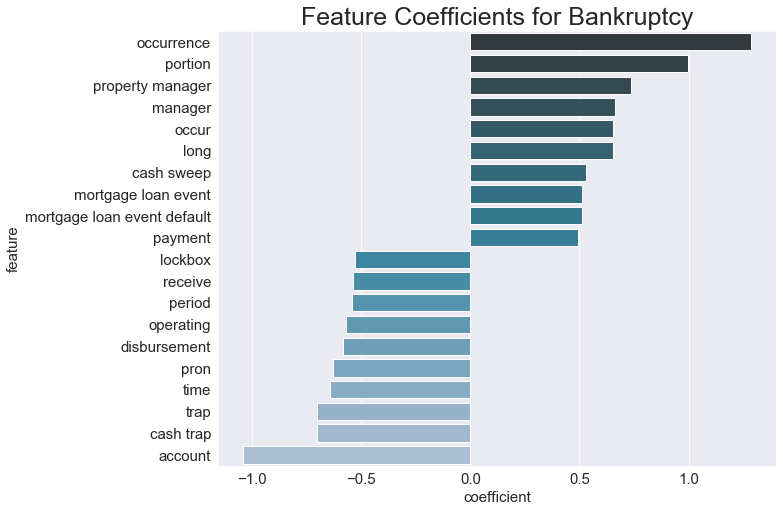

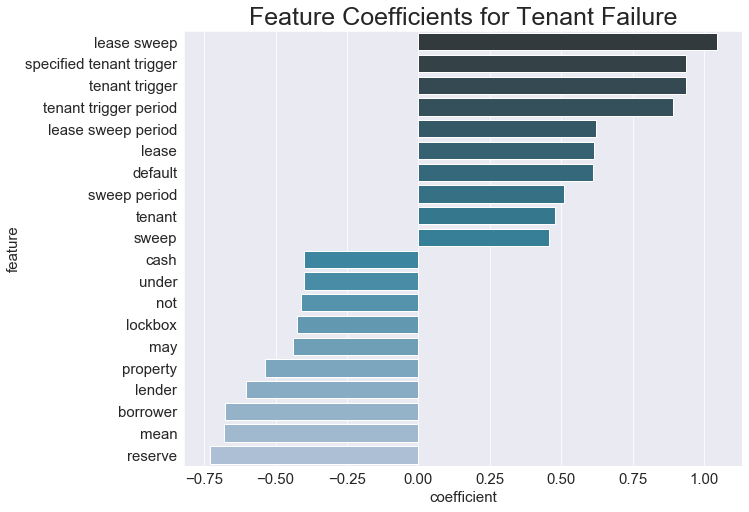

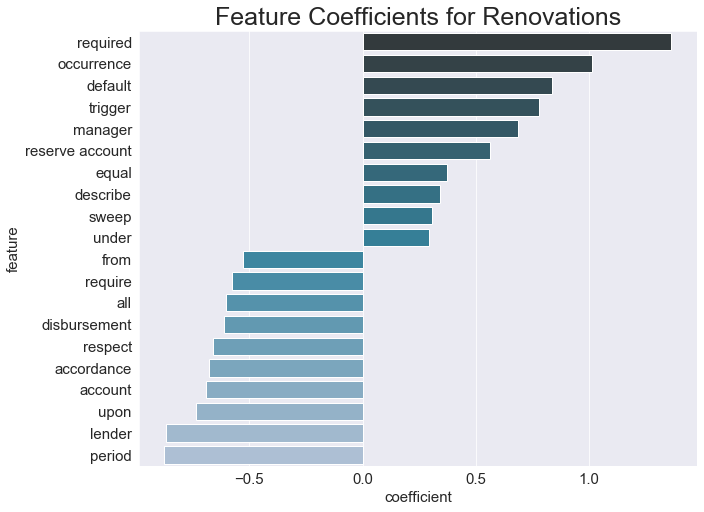

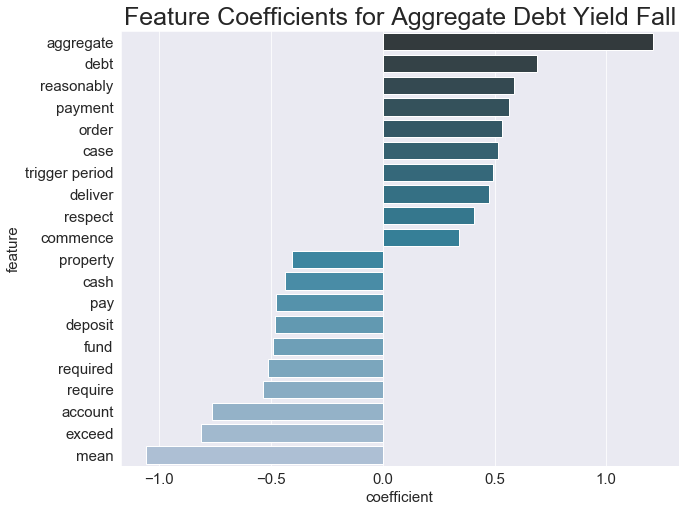

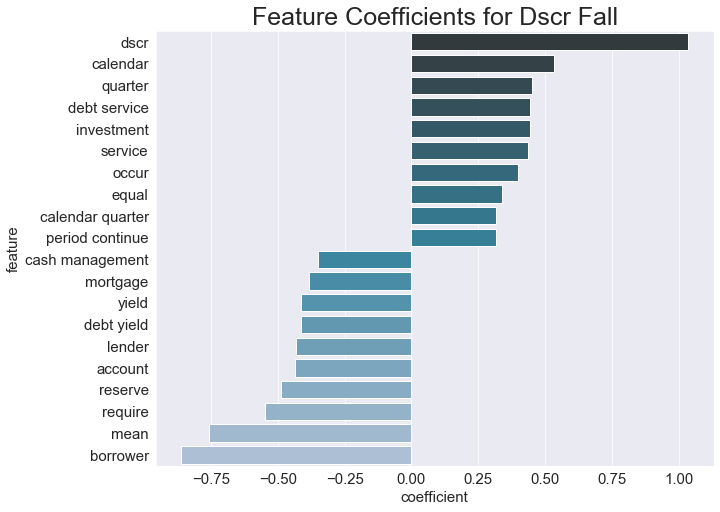

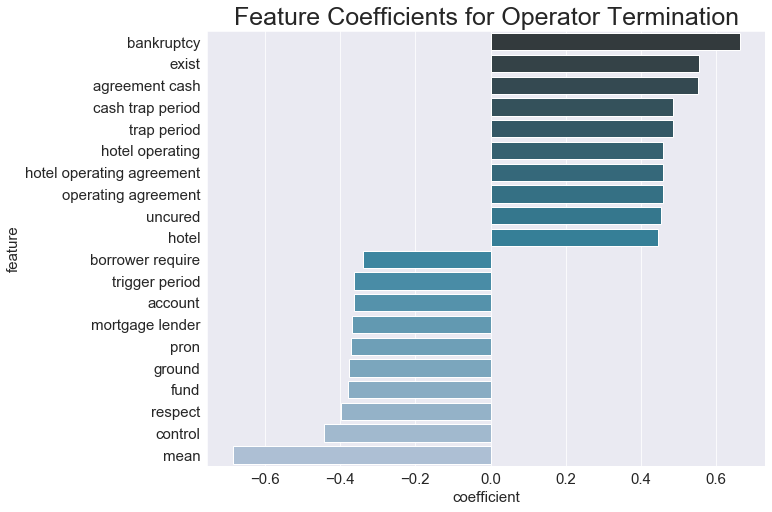

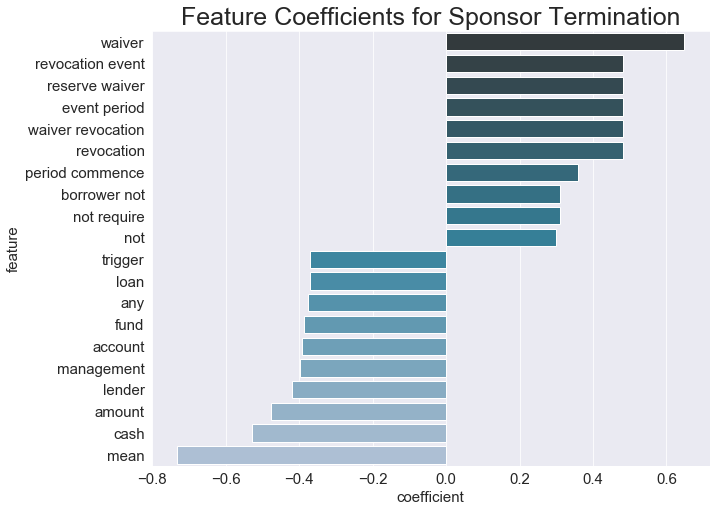

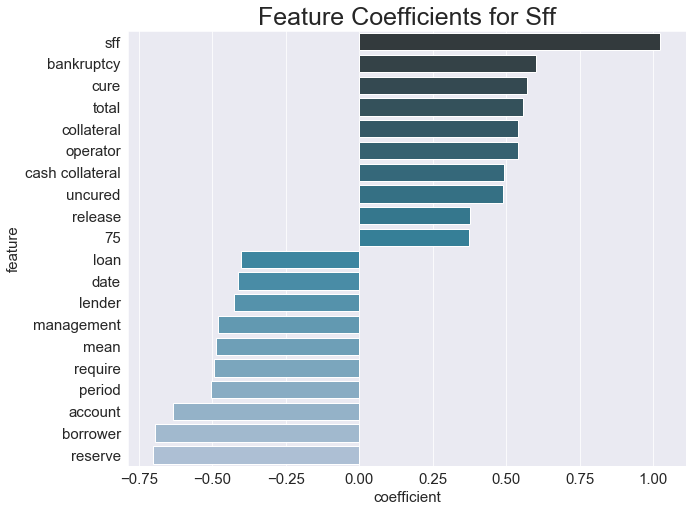

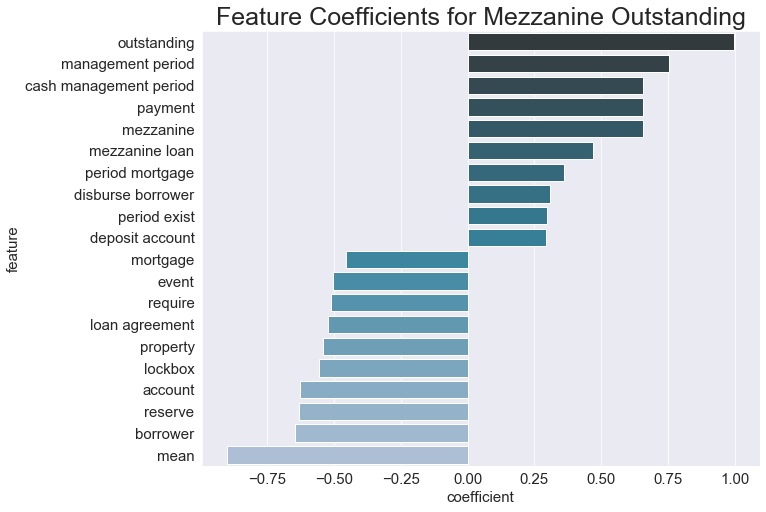

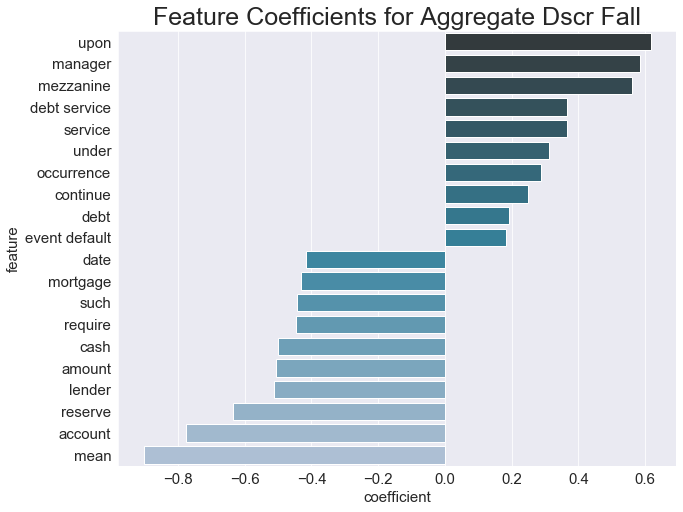

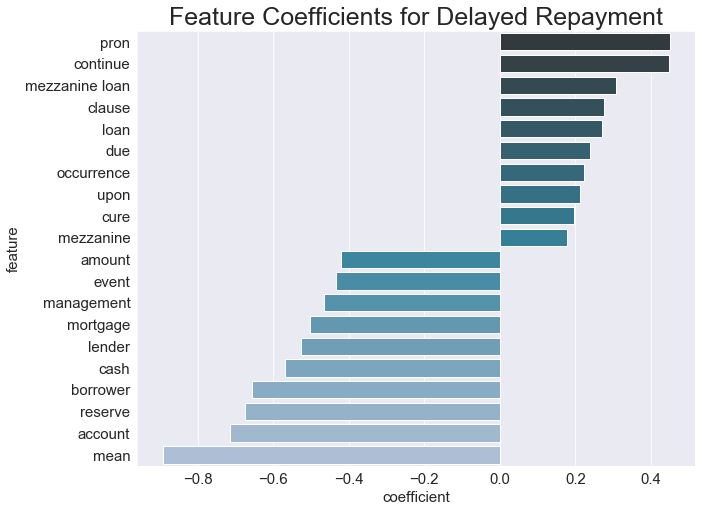

In [8]:
# Call the coefficient plot function
coefficient_plots(results_df)

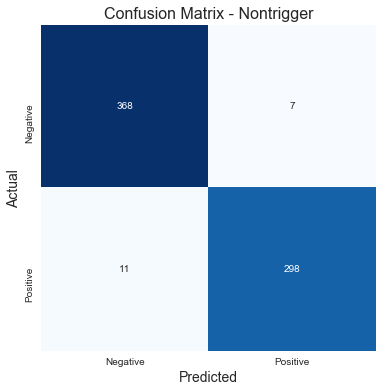

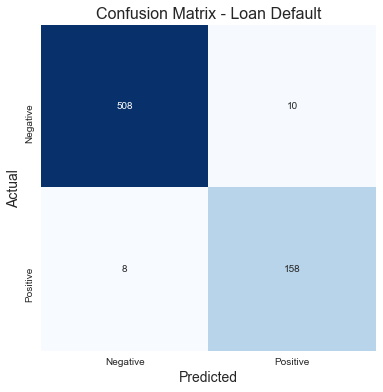

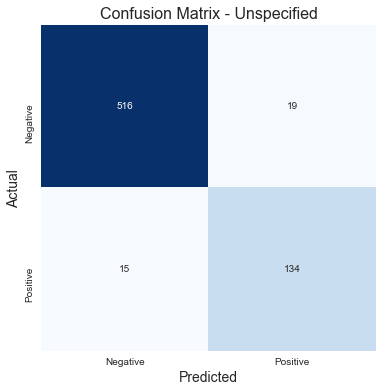

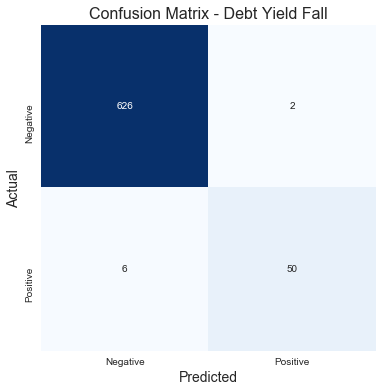

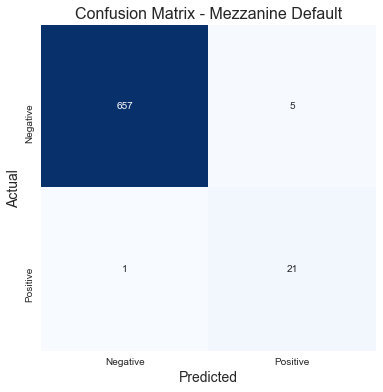

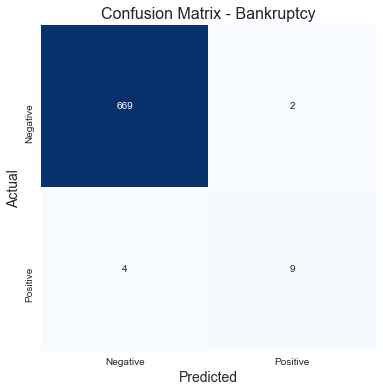

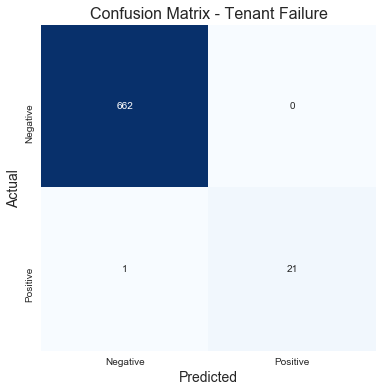

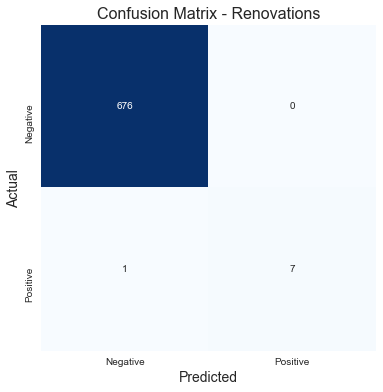

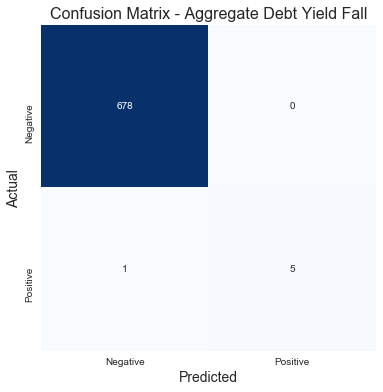

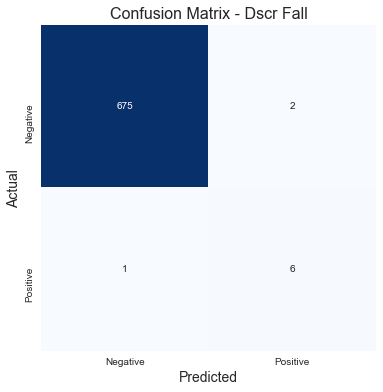

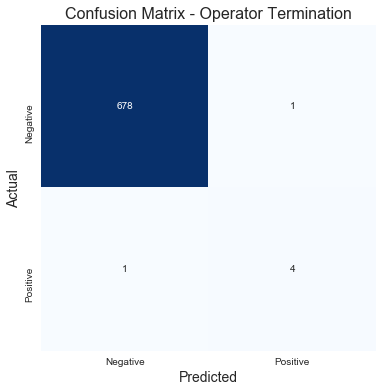

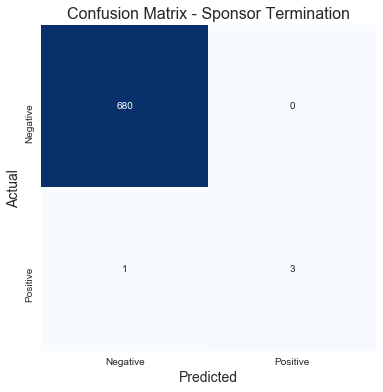

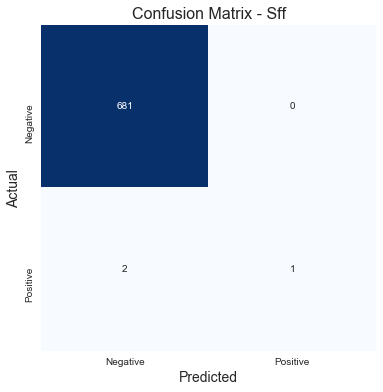

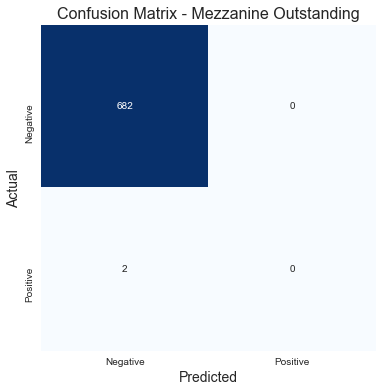

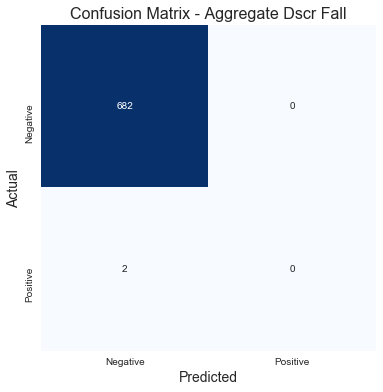

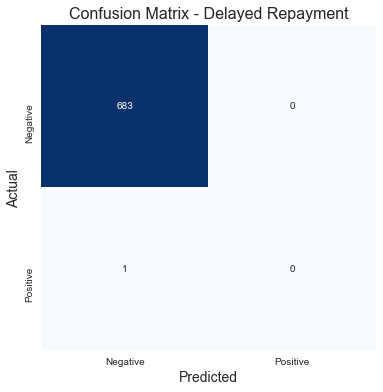

In [9]:
create_confusion_matrix(results_df)